# Business Understanding

### This notebook is in continuation with the EDA done in DiveIntoTheField.ipynb

### Main aim of this notebook is to find :
1. What is salary trend based on?
2. Can we predict the salary based on given features?

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline

# Data Understanding

### Data Gathering

In [2]:
#importing and taking a look at the data
df = pd.read_csv('./survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [3]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### We can clearly see that we have:
#### - Respondent : ID of the respondent, which is none of our use
#### - Independent "numerical" features:  CareerSatisfaction, JobSatisfaction, HoursPerWeek, StackOverflowSatisfaction
#### - Salary : Dependent feature
#### - ExpectedSalary : None of our use for prediction

# Data Preparation

In [4]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - matrix with independent features
    y - matrix with dependent/response feature
    
    '''
    
    # drop all the rows with no salaries
    df.dropna(subset=['Salary'],axis = 0,inplace=True)
    
    # creating matrix with dependent/response feature
    y = df['Salary']
    
    # drop columns which are not required 
    df = df.drop(['Salary', 'Respondent', 'ExpectedSalary'],axis = 'columns')
    
    # list of categorical features
    catCols = df.select_dtypes(include=['O']).columns 
    
    # list of numerical features
    numCols = [i for i in df.columns if i not in catCols]
    
    # filling NaN with mean of numerical features
    for i in numCols:
        df[i].fillna(df[i].mean(),inplace = True)
        
    # creating dummy variables of categorical features
    for i in catCols:
        df = pd.concat([df.drop(i,axis='columns'),pd.get_dummies(df[i],prefix=i,prefix_sep='_',drop_first=True)],axis= 'columns')
    
    X = df
    return X, y

In [5]:
#Use the function to create X and y
df_temp = df.copy()
X, y = clean_data(df_temp)  

In [6]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state=42)

# Modeling

In [7]:
#model instantiate
lm = LinearRegression(normalize=True)

#model fit
lm.fit(X_train,y_train)

#model predict
y_pred = lm.predict(X_test)

#model performance check
r2_score(y_test,y_pred)

-0.6050300288522197

#### Here we can clearly see that the regression didn't fit at all. The possible reason for this could be the presence of plethora of null values

In [8]:
null_df = pd.DataFrame(df.isnull().mean()).reset_index()
null_df.columns = ['Column_Name','Null_Count']
null_df.sort_values('Null_Count',ascending=False,inplace=True,ignore_index=True)
null_df.head(20)

,Column_Name,Null_Count
0,ExCoder10Years,0.982157
1,ExCoderNotForMe,0.982079
2,ExCoderWillNotCode,0.982059
3,ExCoderBalance,0.982040
4,ExCoderReturn,0.982040
5,ExCoderBelonged,0.981943
6,ExCoderActive,0.981904
7,ExCoderSkills,0.981807
8,YearsCodedJobPast,0.981048
9,MobileDeveloperType,0.969781


#### The above dataframe shows that a number of columns have a number of nan values Let's set a threshold for the number of missing values allowed in the used columns. This means, lower values for the threshold results in more predictors in the model.

#### Based on this, we can find the best number of columns being used so as to get the highest r2_score

In [9]:
def best_model(X, y, threshold_list, test_size = .30):
    '''
    INPUT
    X - matrix with independent features
    y - matrix with dependent/response feature
    threshold_list - list of ints, threshold for number of non-zero values in dummy categorical columns
    test_size - proportion of data as test data
    
    OUTPUT
    lm_model - Linear model object
    results - dictionary having r2_score corresponding to each threshold value
    features_dict - dictionary having number of columns corresponding to each threshold value
    rmse_dict = dictionary having Root Mean Squared Error corresponding to each threshold value 
    '''
    
    num_feats, results, features_dict, rmse_dict = [], dict(), dict(), dict()
    i = 0
    
    for cutoff in threshold_list:

        #reduce X matrix
        reduced_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduced_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduced_X, y, test_size = test_size)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_preds = lm_model.predict(X_test)
    
        #append score and number of features corresponding to each threshold value
        results[str(cutoff)] = r2_score(y_test, y_preds)
        features_dict[str(cutoff)] = num_feats[i]
        rmse_dict[str(cutoff)] = math.sqrt(mean_squared_error(y_test, y_preds))
        i += 1

    best_cutoff = max(results, key=results.get)
    print("Best r2_score: "+str(results[best_cutoff]))
    print("Best cut off: "+best_cutoff)
    print("Number of features best: "+str(num_feats[-1]))

    #final X matrix
    final_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(final_X.shape[1])
    print("Final number of features best: "+str(num_feats[-1]))

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = test_size)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)
    
    #check performance
    final_r2 = r2_score(y_test,lm_model.predict(X_test))

    return lm_model,results,features_dict,rmse_dict

In [10]:
#threshold list for number of non-zero values in dummy categorical columns
threshold_list = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]

#fitting the model based on threshold list
lm,result_dict, feat_dict, rmse_dict = best_model(X, y, threshold_list)

Best r2_score: 0.7426241917931498
Best cut off: 30
Number of features best: 3975
Final number of features best: 1383


In [11]:
# dataframe of r2_scores corresponding to each threshold value
result_df = (pd.DataFrame(result_dict,index=[0]).transpose()).reset_index()
result_df.columns = ['Threshold','r2_score']

# dataframe of number of columns corresponding to each threshold value
feat_df = (pd.DataFrame(feat_dict,index=[0]).transpose()).reset_index()
feat_df.columns = ['Threshold','col_count']

# dataframe of number of columns corresponding to each threshold value
rmse_df = (pd.DataFrame(rmse_dict,index=[0]).transpose()).reset_index()
rmse_df.columns = ['Threshold','rmse']

# final dataframe having both the values
final_df = pd.concat([result_df,feat_df.iloc[:,1],rmse_df.iloc[:,1]],axis = 'columns')
final_df

,Threshold,r2_score,col_count,rmse
0,5000,0.164540,35,36299.853490
1,3500,0.518778,68,27896.501648
2,2500,0.580810,136,25966.662105
3,1000,0.635722,282,24052.419086
4,100,0.732477,774,20769.059110
5,50,0.730282,1088,20564.773259
6,30,0.742624,1383,20370.860243
7,20,0.725154,1732,21242.235098
8,10,0.655892,2644,23304.180887
9,5,0.589715,3975,25779.929320


# Model/Result Evaluation

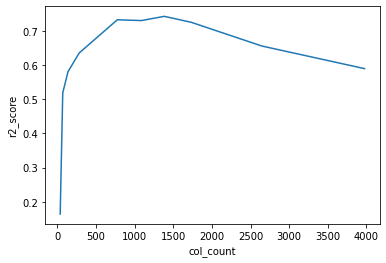

In [12]:
# visualization to check how r2_score is varying with number of features
sns.lineplot(data=final_df,x = 'col_count',y = 'r2_score');

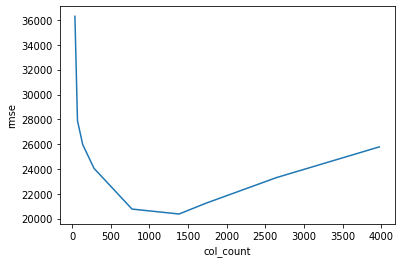

In [13]:
sns.lineplot(data=final_df,x = 'col_count',y = 'rmse');

In [14]:
final_df.sort_values('r2_score',ascending=False)

,Threshold,r2_score,col_count,rmse
6,30,0.742624,1383,20370.860243
4,100,0.732477,774,20769.059110
5,50,0.730282,1088,20564.773259
7,20,0.725154,1732,21242.235098
8,10,0.655892,2644,23304.180887
3,1000,0.635722,282,24052.419086
9,5,0.589715,3975,25779.929320
2,2500,0.580810,136,25966.662105
1,3500,0.518778,68,27896.501648
0,5000,0.164540,35,36299.853490


In [17]:
final_df.sort_values('rmse')

,Threshold,r2_score,col_count,rmse
6,30,0.742624,1383,20370.860243
5,50,0.730282,1088,20564.773259
4,100,0.732477,774,20769.059110
7,20,0.725154,1732,21242.235098
8,10,0.655892,2644,23304.180887
3,1000,0.635722,282,24052.419086
9,5,0.589715,3975,25779.929320
2,2500,0.580810,136,25966.662105
1,3500,0.518778,68,27896.501648
0,5000,0.164540,35,36299.853490


#### Based on the above analysis, we can clearly say that:

### We can predict the variation of salary based on the given features with 74% confidence